In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import turtle
%matplotlib notebook
# Gruvbox theme for jupyter (can be deleted)
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='notebook', ticks=True, grid=True)
plt.rcParams['figure.dpi'] = 60
plt.rcParams['savefig.dpi'] = 60

In [ ]:
## Preparation for tasks 1, 2, 3
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
area = [0]          # Sumarized area at specific second
growthRate = 0.01   # Rate of changing of radius, m/s             <- change to have different results
T = 7              # Time of simulation, minutes                    <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
lifeLength = [0]*(T*60)   # How long does ith bacteria live, s
bact_r     = [[0]*T*60]
amountOfAliveGuys = []

simulation = True
while(simulation):
    bacterias_r += [0]
    bac_is_growing += [True]
    area += [0]
    amountOfAliveGuys += [0]
    
    # Saving data for animations
    bact_r     += [bacterias_r+[0]*(T*60-len(bacterias_r))]
    
    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        bacterias_y[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2)
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
                
    t+=1
    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            lifeLength[i]+=1
            amountOfAliveGuys[t-1]+=1
            hasCollided = False
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2)
            # If bacteria, while growing, is going to touch with other bacteria:
                if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                    hasCollided = True
                    if bac_is_growing[k] and bac_is_growing[i]:
                        bacterias_r[k] += growthRate/2
                        bacterias_r[i] += growthRate/2
                    elif bac_is_growing[k]:
                        bacterias_r[k] += growthRate
                    elif bac_is_growing[i]:
                        bacterias_r[i] += growthRate
                    # both die
                    bac_is_growing[k] = False
                    bac_is_growing[i] = False
            if hasCollided==False:
                bacterias_r[i] += growthRate
        # Calculate sum of areas
        area[t]+=np.pi*bacterias_r[i]**2
        
    if t >= T*60: # Stop simulation after T minutes
        simulation = False

In [ ]:
# Preparation for tasks 1, 2, 3 in the case of 4th task
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
area = [0]          # Sumarized area at specific second
growthRate = 0.01   # Rate of changing of radius, m/s             <- change to have different results
T = 7              # Time of simulation, minutes                 <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
bact_r     = [[0]*T*60]
amountOfAliveGuys = []

simulation = True
while(simulation):
    area += [0]
    amountOfAliveGuys += [0]
    if t<300:
        bacterias_r += [0]
        bac_is_growing += [True]
        
    
    # Saving data for animations
    bact_r += [bacterias_r+[0]*(T*60-len(bacterias_r))]
    
    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        bacterias_y[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2)
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
    t+=1
    
    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            amountOfAliveGuys[t-1]+=1
            hasCollided = False
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2)
            # If bacteria, while growing, is going to touch with other bacteria:
                if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                    hasCollided = True
                    if bac_is_growing[k] and bac_is_growing[i]:
                        bacterias_r[k] += growthRate/2
                        bacterias_r[i] += growthRate/2
                    elif bac_is_growing[k]:
                        bacterias_r[k] += growthRate
                    elif bac_is_growing[i]:
                        bacterias_r[i] += growthRate
                    # both die
                    bac_is_growing[k] = False
                    bac_is_growing[i] = False
            if hasCollided==False:
                bacterias_r[i] += growthRate
        # Calculate sum of areas
        area[t]+=np.pi*bacterias_r[i]**2
        
    if t >= T*60: # Stop simulation after T minutes
        simulation = False

<IPython.core.display.Javascript object>


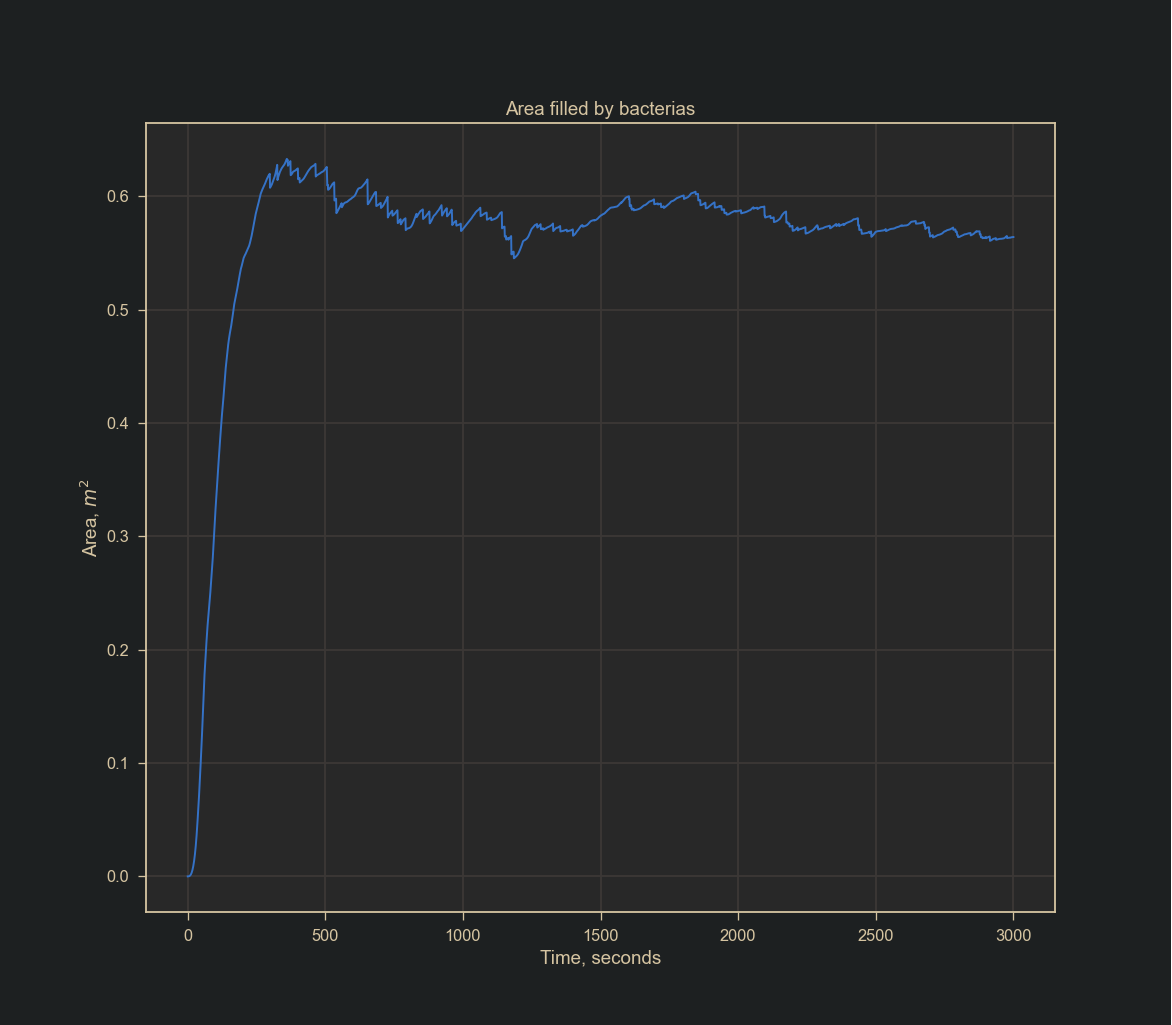

Final area: 0.5639999189228426


In [27]:
# Taks 2 - area(time)
x = np.arange(0, len(area))
plt.plot(x, area)
print("Final area:", area[len(area)-1])

plt.title("Area filled by bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Area, $m^2$")

plt.show()


# Results have shown that area grows really fast at first, but then the rate decreases. 
# Area tends to 1, as expected - 1 is the maximum area
# Graph can be divided into smaller parts, which can be described as x^2 function - area increases
#quadratically because of the change of radiuses. When two bacterias collide, they stop growing, therefore
#the function has some "sharp angles" when this happens.

# If colliding with the borders is negligible, the area will get bigger than 1.
# If not, the area will grow slower.

<IPython.core.display.Javascript object>


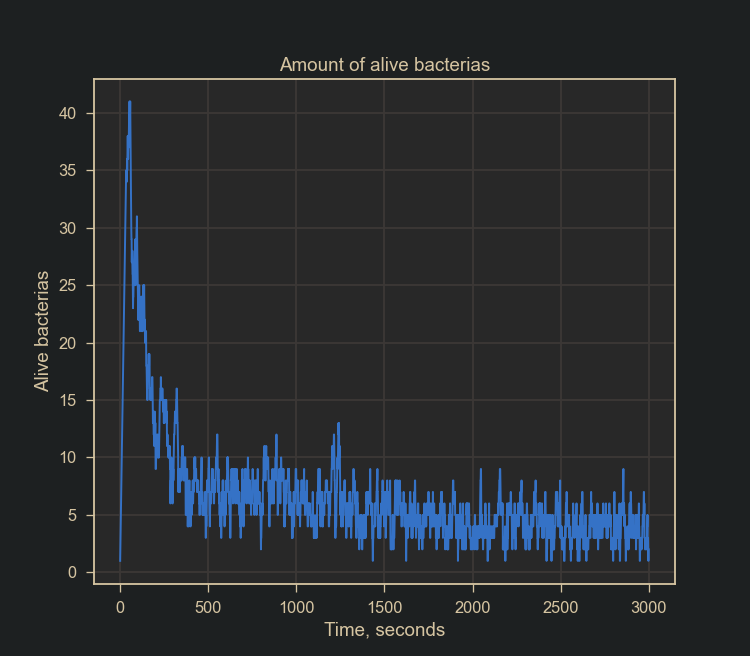

In [28]:
# Taks 2 - amount of alive bacterias(time)
x = np.arange(0, len(amountOfAliveGuys))
plt.plot(x, amountOfAliveGuys)

plt.title("Amount of alive bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Alive bacterias")

plt.show()

In [ ]:
# Task 3 - time of bacterias life
x = np.arange(0, len(lifeLength))
plt.plot(x, lifeLength)

plt.title("Time of bacterias life")
plt.xlabel("Bacteria's number")
plt.ylabel("Lifelength")

plt.show()

<IPython.core.display.Javascript object>


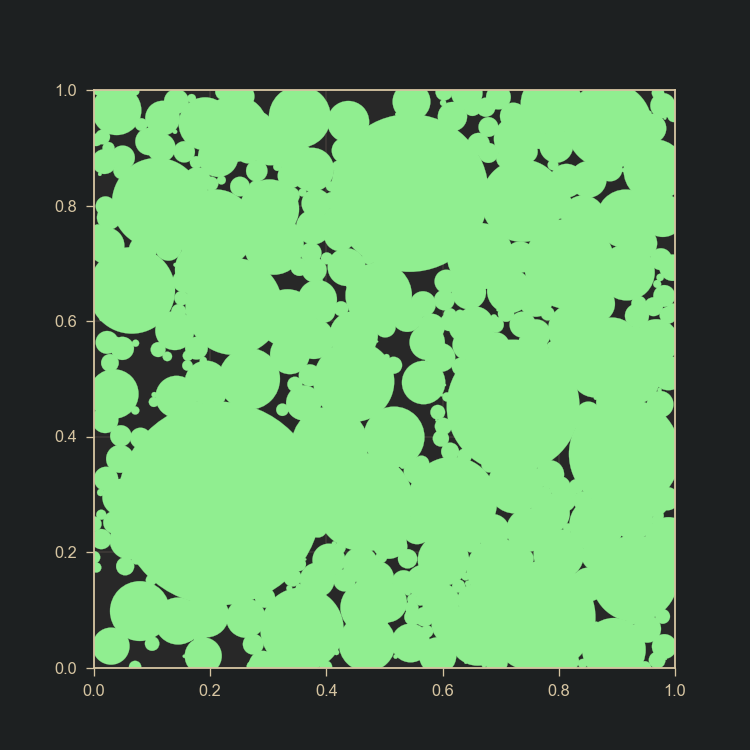

MovieWriter imagemagick unavailable; using Pillow instead.


In [8]:
# Visualisation of 2D growth
fig, ax = plt.subplots(figsize=(8, 8))
ax.set(xlim=(0, 1), ylim=(0, 1))
ax.set_axisbelow(True)

scat = ax.scatter(bacterias_x, bacterias_y, s=bact_r[0], c='lightgreen')

def animate(i):
    sizes = np.array(bact_r[i])
    scat.set_sizes(sizes**2*900000)
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=T*60-1)

anim.save('/animation.gif', writer='imagemagick', fps=20)
# plt.show()

# Tasks 1,2,3 in 3D

In [9]:
# Preparation for tasks 1, 2, 3 in the case of 5th task (3D)
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
volume = [0]          # Sumarized volume at specific second
growthRate = 0.001   # Rate of changing of radius, m/s             <- change to have different results
T = 20              # Time of simulation, minutes                  <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
bacterias_z = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_eaten = [0]*(T*60) # How many bacterias were eaten by ith bacteria     <- Task 6 - array of eaten
which_bacterias_eaten = [[-1]] # Which bacterias were eaten                 <- Task 6

bact_r     = [[0]*T*60]
amountOfAliveGuys = []

simulation = True
while(simulation):
    volume += [0]
    amountOfAliveGuys += [0]
    which_bacterias_eaten.append([-1])
    if t<11300:
        bacterias_r += [0]
        bac_is_growing += [True]
        
    
    # Saving data for animations
    bact_r += [bacterias_r+[0]*(T*60-len(bacterias_r))]
    
    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        bacterias_y[t] = random.random()
        bacterias_z[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2+ (bacterias_z[t]-bacterias_z[k])**2)
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
    t+=1
    
    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            amountOfAliveGuys[t-1]+=1
            hasCollided = False
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2+ (bacterias_z[i]-bacterias_z[k])**2)
            # If bacteria, while growing, is going to touch with other bacteria:
                if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                    hasCollided = True
                    if bac_is_growing[k]:
                        bacterias_r[k] += (distance-bacterias_r[i]-bacterias_r[k])/2
                        bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])/2
                    else:
                        bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])
                    # both die
                    bac_is_growing[k] = False
                    bac_is_growing[i] = False
                    
                    bacterias_eaten[k] += 1
                    bacterias_eaten[i] += 1
                    which_bacterias_eaten[k].append(i)
                    which_bacterias_eaten[i].append(k)
                    if bacterias_eaten[k] >= 7:
                        bacterias_r[k] = 0
                        bacterias_x[k] = -100
                        for b in which_bacterias_eaten[k]:
                            if b!=-1:
                                which_bacterias_eaten[b].remove(k)
                                bacterias_eaten[b] -= 1
                    if bacterias_eaten[i] >= 7:
                        bacterias_r[i] = 0
                        bacterias_x[i] = -100
                        for b in which_bacterias_eaten[i]:
                            if b!=-1:
                                which_bacterias_eaten[b].remove(i)
                                bacterias_eaten[b] -= 1
            if hasCollided==False:
                bacterias_r[i] += growthRate
        # Calculate sum of volumes
        volume[t]+=4*np.pi*bacterias_r[i]**3/3
        
    if t >= T*60: # Stop simulation after T minutes
        simulation = False

In [ ]:
from vpython import * # library for 3d
# 3D visualisation
scene = canvas(title='3D bacterias growth')
# Create axes:
c = curve(vector(0,0,0), vector(1,0,0))
c = curve(vector(0,0,1), vector(1,0,1))
c = curve(vector(0,1,0), vector(1,1,0))
c = curve(vector(0,1,1), vector(1,1,1))
c = curve(vector(0,0,0), vector(0,1,0))
c = curve(vector(1,0,0), vector(1,1,0))
c = curve(vector(1,0,1), vector(1,1,1))
c = curve(vector(0,0,1), vector(0,1,1))
c = curve(vector(0,0,0), vector(0,0,1))
c = curve(vector(1,0,0), vector(1,0,1))
c = curve(vector(1,1,0), vector(1,1,1))
c = curve(vector(0,1,0), vector(0,1,1))

# 3D bacterias
ball=[]
for bacteria in range(0, T*60):
    ball.append(sphere(pos=vector(bacterias_x[bacteria],bacterias_y[bacteria],bacterias_z[bacteria]),
                       size=vector(0,0,0),
                       color=vector(0,1,0)))
for time in range(0, 4):
    rate(1)
# Main cycle - animation
for time in range(0, T*60):
    rate(10)
    for bacteria in range(0, T*60):
        ball[bacteria].size = 2*vector(bact_r[time][bacteria],bact_r[time][bacteria],bact_r[time][bacteria])


<IPython.core.display.Javascript object>


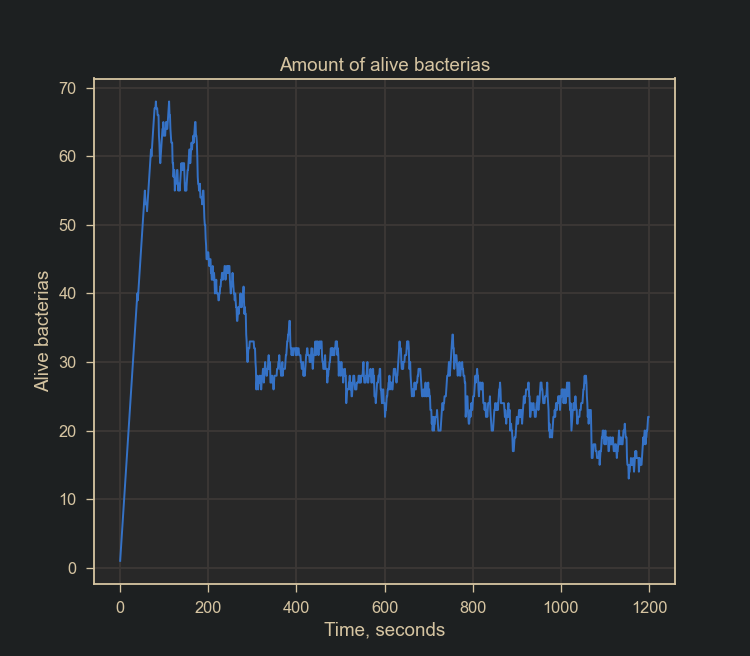

In [10]:
# Tasks 2 and 3 in 3d
x = np.arange(0, len(amountOfAliveGuys))
plt.plot(x, amountOfAliveGuys)

plt.title("Amount of alive bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Alive bacterias")

plt.show()

<IPython.core.display.Javascript object>


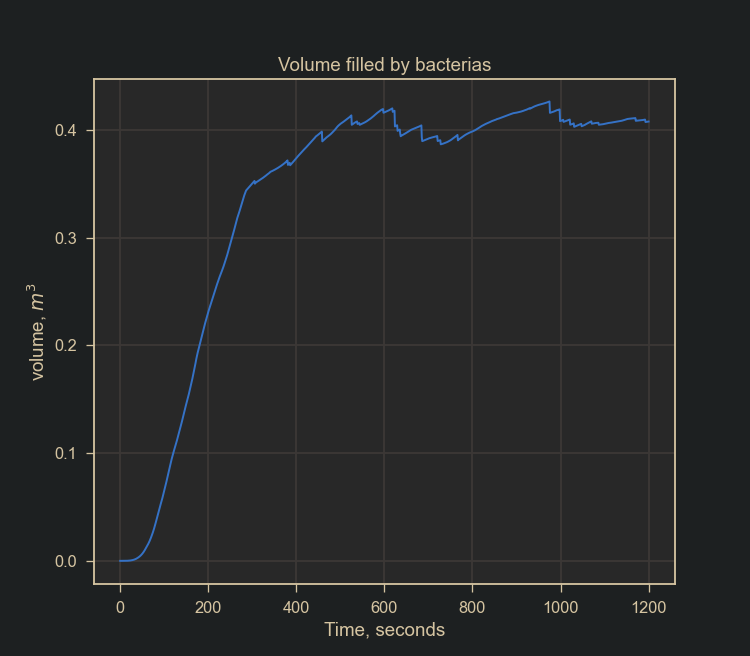

Final volume: 0.4077954532690467


In [12]:
# Taks 2 - volume(time)
x = np.arange(0, len(volume))
plt.plot(x, volume)
print("Final volume:", volume[len(volume)-1])

plt.title("Volume filled by bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("volume, $m^3$")

plt.show()

# Task 6 - hungry bacterias

In [29]:
# Preparation for tasks 1, 2, 3
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
area = [0]          # Sumarized area at specific second
growthRate = 0.001   # Rate of changing of radius, m/s             <- change to have different results
T = 50              # Time of simulation, minutes                   <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
bacterias_eaten = [0]*(T*60) # How many bacterias were eaten by ith bacteria     <- Task 6 - array of eaten bacterias
which_bacterias_eaten = [[-1]] # Which bacterias were eaten                 <- Task 6
lifeLength = [0]*(T*60)   # How long does ith bacteria live, s
bact_r     = [[0]*T*60]
amountOfAliveGuys = []

simulation = True
while(simulation):
    bacterias_r += [0]
    bac_is_growing += [True]
    area += [0]
    amountOfAliveGuys += [0]
    which_bacterias_eaten.append([-1])
    
    # Saving data for animations
    bact_r     += [bacterias_r+[0]*(T*60-len(bacterias_r))]
    
    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        bacterias_y[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2)
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
    t+=1
    
    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            lifeLength[i]+=1
            amountOfAliveGuys[t-1]+=1
            hasCollided = False
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2)
            # If bacteria, while growing, is going to touch with other bacteria:
                if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                    hasCollided = True
                    if bac_is_growing[k] and bac_is_growing[i]:
                        bacterias_r[k] += growthRate/2
                        bacterias_r[i] += growthRate/2
                    elif bac_is_growing[k]:
                        bacterias_r[k] += growthRate
                    elif bac_is_growing[i]:
                        bacterias_r[i] += growthRate
                    # both die
                    bac_is_growing[k] = False
                    bac_is_growing[i] = False
                    
                    bacterias_eaten[k]+=1
                    bacterias_eaten[i]+=1
                    which_bacterias_eaten[k].append(i)
                    which_bacterias_eaten[i].append(k)
                    if bacterias_eaten[k] >= 5:
                        bacterias_r[k] = 0
                        bacterias_x[k] = -100
                        for b in which_bacterias_eaten[k]:
                            if b!=-1:
                                which_bacterias_eaten[b].remove(k)
                                bacterias_eaten[b] -= 1
                    if bacterias_eaten[i] >= 5:
                        bacterias_r[i] = 0
                        bacterias_x[i] = -100
                        for b in which_bacterias_eaten[i]:
                            if b!=-1:
                                which_bacterias_eaten[b].remove(i)
                                bacterias_eaten[b] -= 1
            if hasCollided==False:
                bacterias_r[i] += growthRate
        # Calculate sum of areas
        area[t]+=np.pi*bacterias_r[i]**2
        
    if t >= T*60: # Stop simulation after T minutes
        simulation = False

In [2]:
# Preparation for tasks 1, 2, 3 in 1D
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
length = [0]          # Sumarized area at specific second
growthRate = 0.001   # Rate of changing of radius, m/s             <- change to have different results
T = 2              # Time of simulation, minutes                   <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0.5]*(T*60)  # Coordinate y of bacteria, m
bacterias_eaten = [0]*(T*60) # How many bacterias were eaten by ith bacteria     <- Task 6 - array of eaten bacterias
which_bacterias_eaten = [[-1]] # Which bacterias were eaten                 <- Task 6
lifeLength = [0]*(T*60)   # How long does ith bacteria live, s

for i in range(0,T*60):
    bacterias_x[i] = random.random()
bact_r = [[0]*T*60]
amountOfAliveGuys = []

simulation = True
while(simulation):
    bacterias_r += [0]
    bac_is_growing += [True]
    length += [0]
    amountOfAliveGuys += [0]
    which_bacterias_eaten.append([-1])
    
    # Saving data for animations
    bact_r     += [bacterias_r+[0]*(T*60-len(bacterias_r))]
    
    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = abs(bacterias_x[t]-bacterias_x[k])
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
    t+=1
    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            lifeLength[i]+=1
            amountOfAliveGuys[t-1]+=1
            hasCollided = False
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = abs(bacterias_x[i]-bacterias_x[k])
                # If bacteria, while growing, is going to touch other bacteria:
                if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                    hasCollided = True
                    if bac_is_growing[k]:
                        bacterias_r[k] += (distance-bacterias_r[i]-bacterias_r[k])/2
                        bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])/2
                    else:
                        bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])
                        
                    # both die
                    bac_is_growing[k] = False
                    bac_is_growing[i] = False
                    
                    bacterias_eaten[k]+=1
                    bacterias_eaten[i]+=1
                    which_bacterias_eaten[k].append(i)
                    which_bacterias_eaten[i].append(k)
                    if bacterias_eaten[k] >= 2 and bacterias_eaten[i] >= 2:
                        bacterias_r[k] = 0
                        bacterias_x[k] = -100
                        bacterias_r[i] = 0
                        bacterias_x[i] = -100
                        for b in which_bacterias_eaten[k]:
                            if b!=-1 and (k in which_bacterias_eaten[b]):
                                which_bacterias_eaten[b].remove(k)
                            bacterias_eaten[b] -= 1
                        for b in which_bacterias_eaten[i]:
                            if b!=-1 and (i in which_bacterias_eaten[b]):
                                which_bacterias_eaten[b].remove(i)
                            bacterias_eaten[b] -= 1
                    if bacterias_eaten[k] >= 1:
                        bacterias_r[k] = 0
                        bacterias_x[k] = -100
                        for b in which_bacterias_eaten[k]:
                            if b!=-1 and (k in which_bacterias_eaten[b]):
                                which_bacterias_eaten[b].remove(k)
                            bacterias_eaten[b] -= 1
                    if bacterias_eaten[i] >= 1:
                        bacterias_r[i] = 0
                        bacterias_x[i] = -100
                        for b in which_bacterias_eaten[i]:
                            if b!=-1 and (i in which_bacterias_eaten[b]):
                                which_bacterias_eaten[b].remove(i)
                            bacterias_eaten[b] -= 1
            if hasCollided==False:
                bacterias_r[i] += growthRate
        # Calculate sum of lengthes
        length[t]+=2*bacterias_r[i]
        
    if t >= T*60: # Stop simulation after T minutes
        simulation = False

<IPython.core.display.Javascript object>


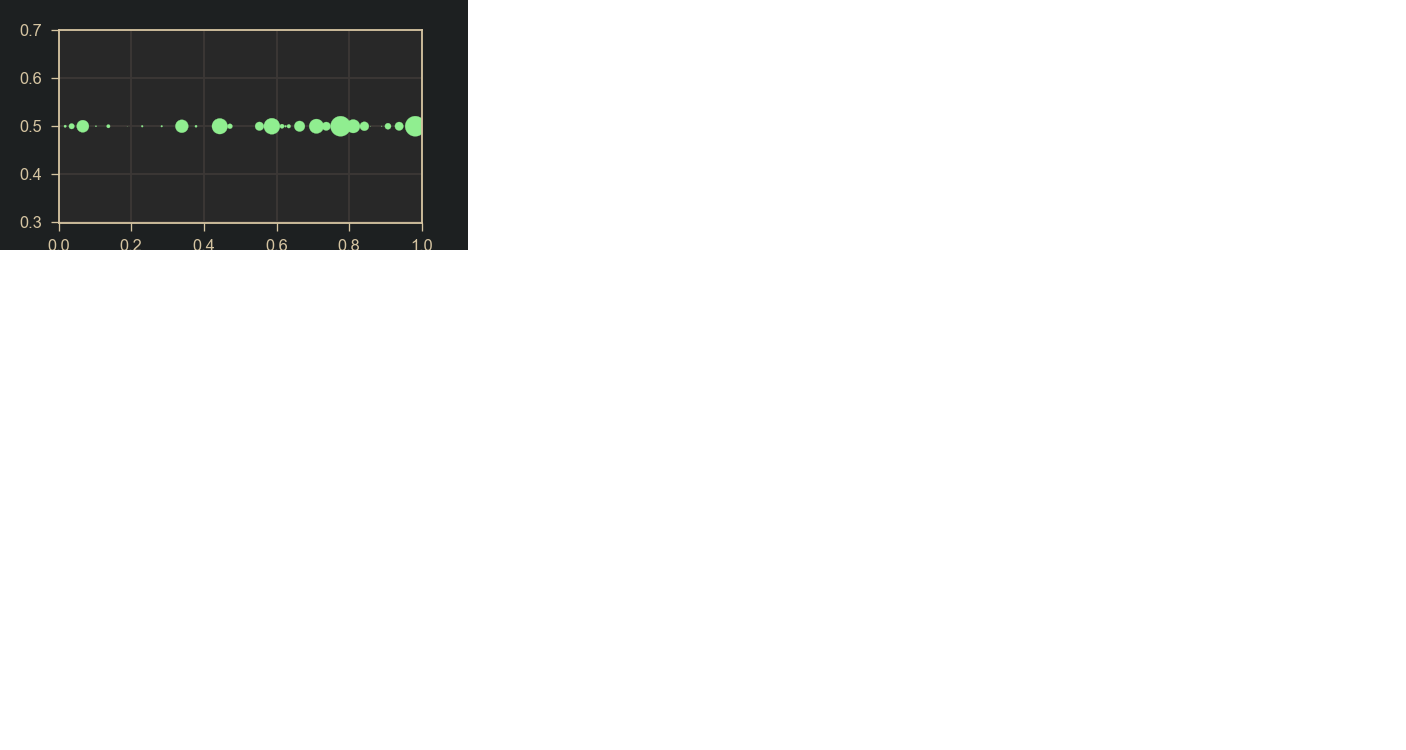

MovieWriter ffmpeg unavailable; using Pillow instead.


In [3]:
# Visualisation of 1D growth
fig, ax = plt.subplots(figsize=(15, 8))
ax.set(xlim=(0, 1), ylim=(0.3, 0.7))
ax.set_axisbelow(True)

scat = ax.scatter(bacterias_x, bacterias_y, s=bact_r[0], c='lightgreen')

def animate(i):
    sizes = np.array(bact_r[i])
    scat.set_sizes(sizes**2*900000)
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=T*60-1)

anim.save('/animation.gif', fps=20)
# plt.show()

<IPython.core.display.Javascript object>


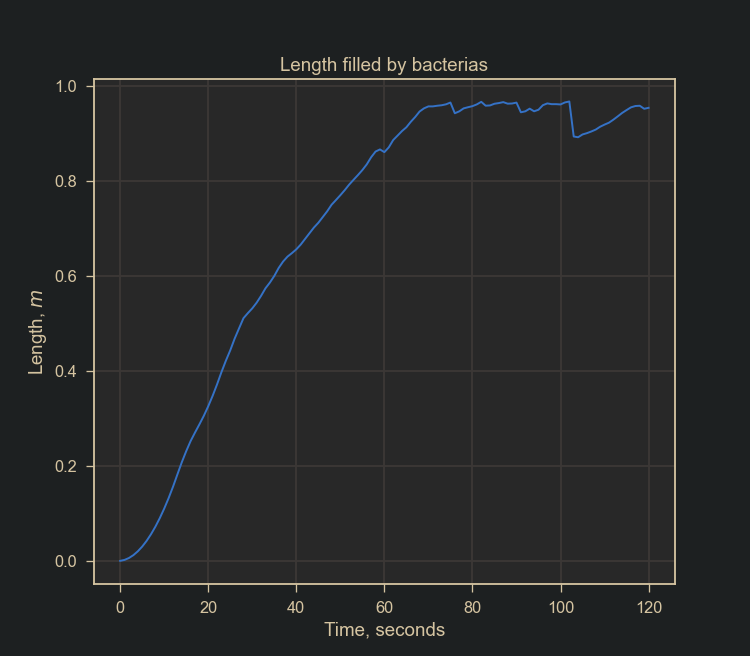

Final Length: 0.9535657885565184


In [75]:
# Taks 2 - length(time)
x = np.arange(0, len(length))
plt.plot(x, length)
print("Final Length:", length[len(length)-1])

plt.title("Length filled by bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Length, $m$")

plt.show()

<IPython.core.display.Javascript object>


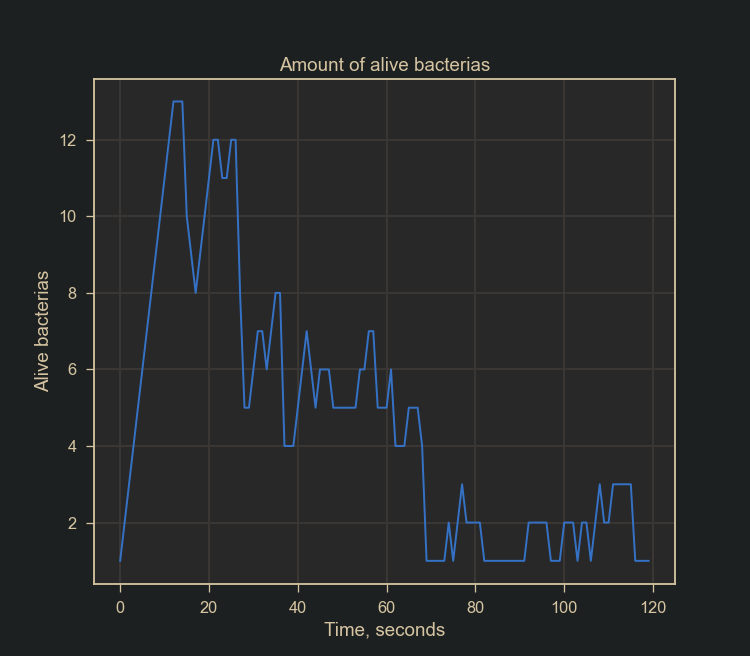

In [76]:
# Taks 2 - amount of alive bacterias(time)
x = np.arange(0, len(amountOfAliveGuys))
plt.plot(x, amountOfAliveGuys)

plt.title("Amount of alive bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Alive bacterias")

plt.show()

# Task 7 - bacterias size distribution

In [95]:
def avg():
    # Preparation for tasks 1, 2, 3 in the case of 5th task (3D)
    bacterias_r = []    # Radius of bacteria, m
    bac_is_growing = [] # Is bacteria still growing?
    volume = [0]          # Sumarized volume at specific second
    growthRate = 0.001   # Rate of changing of radius, m/s             <- change to have different results
    T = 50              # Time of simulation, minutes                  <- change to have different results
    t = 0
    index = 0
    bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
    bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
    bacterias_z = [0]*(T*60)  # Coordinate x of bacteria, m
    bacterias_eaten = [0]*(T*60) # How many bacterias were eaten by ith bacteria     <- Task 6 - array of eaten
    which_bacterias_eaten = [[-1]] # Which bacterias were eaten                 <- Task 6

    bact_r     = [[0]*T*60]
    amountOfAliveGuys = []

    simulation = True
    while(simulation):
        volume += [0]
        amountOfAliveGuys += [0]
        which_bacterias_eaten.append([-1])
        bacterias_r += [0]
        bac_is_growing += [True]


        # Saving data for animations
        bact_r += [bacterias_r+[0]*(T*60-len(bacterias_r))]

        # Spawning new bacteria
        spawned = False
        while spawned == False:
            spawned = True
            bacterias_x[t] = random.random()
            bacterias_y[t] = random.random()
            bacterias_z[t] = random.random()
            for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2+ (bacterias_z[t]-bacterias_z[k])**2)
                if distance <= bacterias_r[k] and t!=k:
                    spawned = False
        t+=1

        for i in range(0, len(bacterias_r)):
            if bac_is_growing[i] == True: # If bacteria is alive
                amountOfAliveGuys[t-1]+=1
                hasCollided = False
                for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                    distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2+ (bacterias_z[i]-bacterias_z[k])**2)
                # If bacteria, while growing, is going to touch with other bacteria:
                    if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                        hasCollided = True
                        if bac_is_growing[k]:
                            bacterias_r[k] += (distance-bacterias_r[i]-bacterias_r[k])/2
                            bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])/2
                        else:
                            bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])
                        # both die
                        bac_is_growing[k] = False
                        bac_is_growing[i] = False

                        bacterias_eaten[k] += 1
                        bacterias_eaten[i] += 1
                        which_bacterias_eaten[k].append(i)
                        which_bacterias_eaten[i].append(k)
                        if bacterias_eaten[k] >= 5:
                            bacterias_r[k] = 0
                            bacterias_x[k] = -100
                            for b in which_bacterias_eaten[k]:
                                if b!=-1:
                                    which_bacterias_eaten[b].remove(k)
                                    bacterias_eaten[b] -= 1
                        if bacterias_eaten[i] >= 5:
                            bacterias_r[i] = 0
                            bacterias_x[i] = -100
                            for b in which_bacterias_eaten[i]:
                                if b!=-1:
                                    which_bacterias_eaten[b].remove(i)
                                    bacterias_eaten[b] -= 1
                if hasCollided==False:
                    bacterias_r[i] += growthRate
            # Calculate sum of volumes
            volume[t]+=4*np.pi*bacterias_r[i]**3/3

        if t >= T*60: # Stop simulation after T minutes
            simulation = False
    alives=[]
    for i in range(0, T*60):
        if bac_is_growing[i]:
            alives+=[bacterias_r[i]]
    return alives

<IPython.core.display.Javascript object>


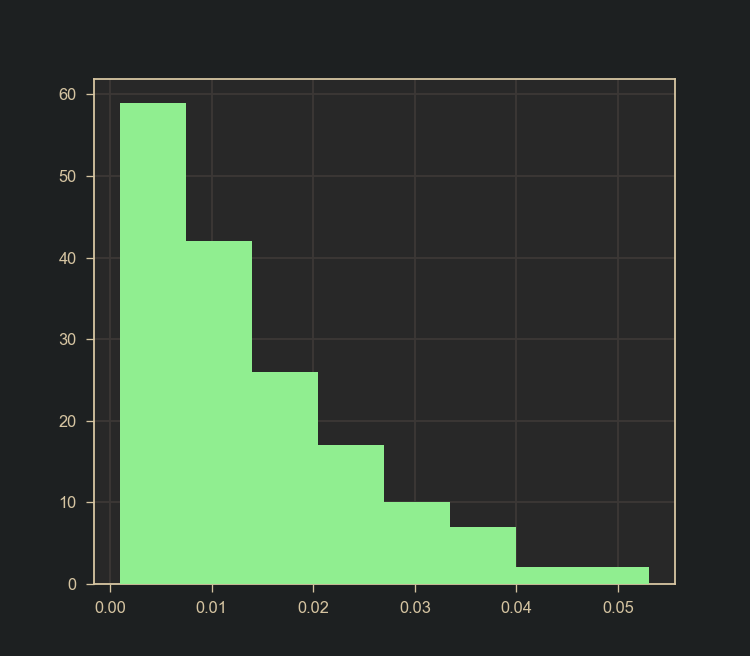

In [97]:
x=[]
for i in range(0, 10):
    x+=avg()
num_bins = 8
n, bins, patches = plt.hist(x, num_bins, zorder=10, facecolor='lightgreen')
plt.show()

# Dodatok

In [23]:
collidingWithWalls = False
bacterias_r = []    # Radius of bacteria, m
bac_is_growing = [] # Is bacteria still growing?
area = [0]          # Sumarized area at specific second
growthRate = 0.00005   # Rate of changing of radius, m/s             <- change to have different results
T = 7              # Time of simulation, minutes                 <- change to have different results
t = 0
index = 0
bacterias_x = [0]*(T*60)  # Coordinate x of bacteria, m
bacterias_y = [0]*(T*60)  # Coordinate y of bacteria, m
bact_r     = [[0]*T*60]
amountOfAliveGuys = []
bacterias_eaten = [0]*(T*60) # How many bacterias were eaten by ith bacteria     <- Task 6 - array of eaten
which_bacterias_eaten = [[-1]] # Which bacterias were eaten                 <- Task 6
simulation = True
while(simulation):
    area += [0]
    amountOfAliveGuys += [0]
    bacterias_r += [0]
    bac_is_growing += [True]

    # Saving data for animations
    bact_r += [bacterias_r+[0]*(T*60-len(bacterias_r))]

    # Spawning new bacteria
    spawned = False
    while spawned == False:
        spawned = True
        bacterias_x[t] = random.random()
        bacterias_y[t] = random.random()
        for k in range(0, len(bacterias_r)): # Check if bacterias intersect
            distance = np.sqrt((bacterias_x[t]-bacterias_x[k])**2 + (bacterias_y[t]-bacterias_y[k])**2)
            if distance <= bacterias_r[k] and t!=k:
                spawned = False
    t+=1

    for i in range(0, len(bacterias_r)):
        if bac_is_growing[i] == True: # If bacteria is alive
            hasCollided = False
            amountOfAliveGuys[t-1]+=1
            if collidingWithWalls:
                if bacterias_x[i]<bacterias_r[i]\
                or 1-bacterias_x[i]<bacterias_r[i]\
                or bacterias_y[i]<bacterias_r[i]\
                or 1-bacterias_y[i]<bacterias_r[i]:
                    hasCollided = True
                    bac_is_growing[i] = False
            if hasCollided == False:
                for k in range(0, len(bacterias_r)): # Check if bacterias intersect
                    distance = np.sqrt((bacterias_x[i]-bacterias_x[k])**2 + (bacterias_y[i]-bacterias_y[k])**2)
                # If bacteria, while growing, is going to touch with other bacteria:
                    if distance <= bacterias_r[i]+bacterias_r[k]+growthRate*2 and i!=k:
                        hasCollided = True
                        if bac_is_growing[k]:
                            bacterias_r[k] += (distance-bacterias_r[i]-bacterias_r[k])/2
                            bacterias_r[i] += (distance-bacterias_r[i]-bacterias_r[k])/2
                        else:
                            bacterias_r[i] += distance-bacterias_r[i]-bacterias_r[k]
                        # both die
                        bac_is_growing[k] = False
                        bac_is_growing[i] = False
                if hasCollided==False:
                    bacterias_r[i] += growthRate
        # Calculate sum of areas
        area[t]+=np.pi*bacterias_r[i]**2

    if t >= T*60: # Stop simulation after T minutes
        simulation = False


<IPython.core.display.Javascript object>


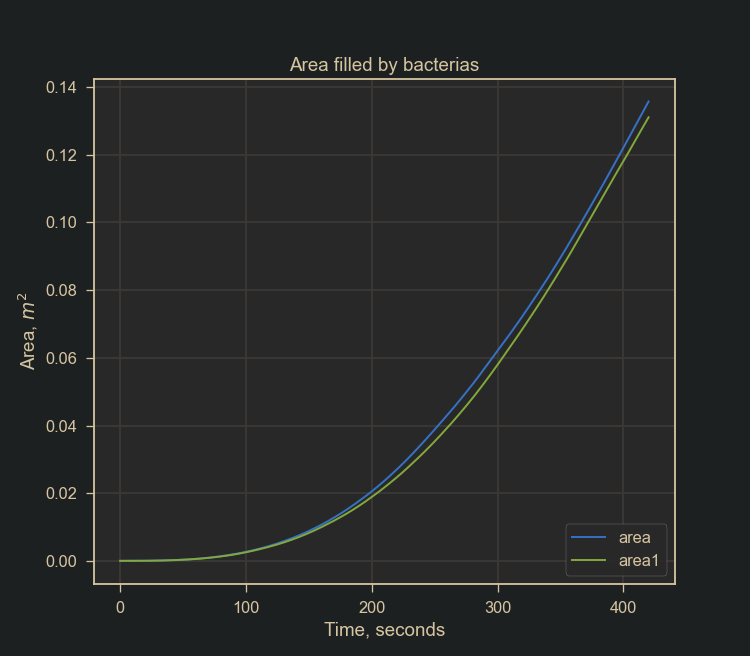

In [24]:
# Taks 2 - area(time)
x = np.arange(0, len(area))
# area1 = area
plt.plot(x, area, label='area')
plt.plot(x, area1, label='area1')

plt.title("Area filled by bacterias")
plt.xlabel("Time, seconds")
plt.ylabel("Area, $m^2$")
plt.legend(loc='lower right')

plt.show()